# **Implementation of KNN algorithm**

### Importing necessary packages

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

pd.pandas.set_option("display.max_columns", None)

In [79]:
# Reading data

df = pd.read_csv("Classified Data", index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [80]:
df.shape

(1000, 11)

In [81]:
X = df.iloc[:, :-1] # Independent variables
y = df.iloc[:, -1] # Dependent variable

In [82]:
# Splitiing data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
# Standardizing
scaler = StandardScaler()
std_X_train = scaler.fit_transform(X_train)
std_X_test = scaler.transform(X_test)

In [84]:
# Training
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [85]:
pred_y = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.92      0.94       158

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



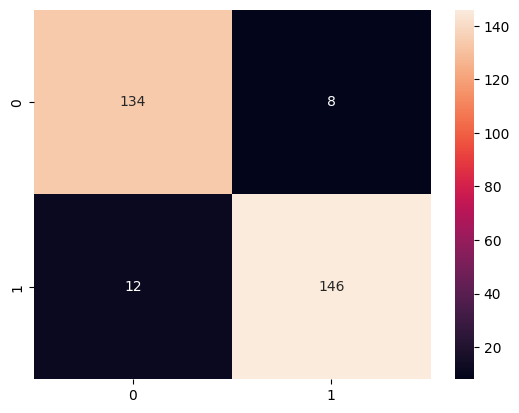

In [86]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, pred_y), annot=True, fmt='d')

# Classification report
print(classification_report(y_test, pred_y))

In [75]:
# Training of different K - values : For Computing Error rate per K - value
error_rate = []
for i in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_y = knn.predict(X_test)
  error_rate.append(np.mean(y_test != pred_y))

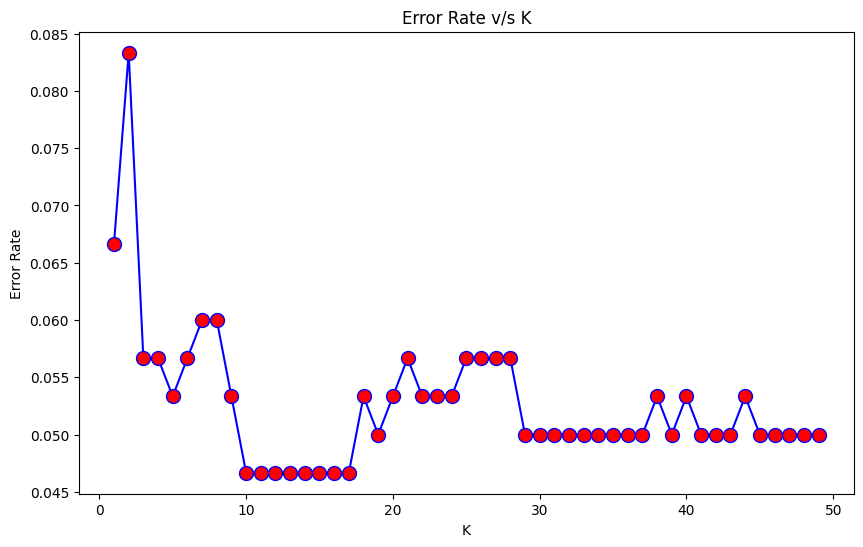

In [76]:
# Plotting error rate per k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), error_rate, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title("Error Rate v/s K")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

In [77]:
# Training per K value : Computing Accuracy score (cross - val) per K - value
accuracy_score = []
for i in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
  accuracy_score.append(np.mean(score))

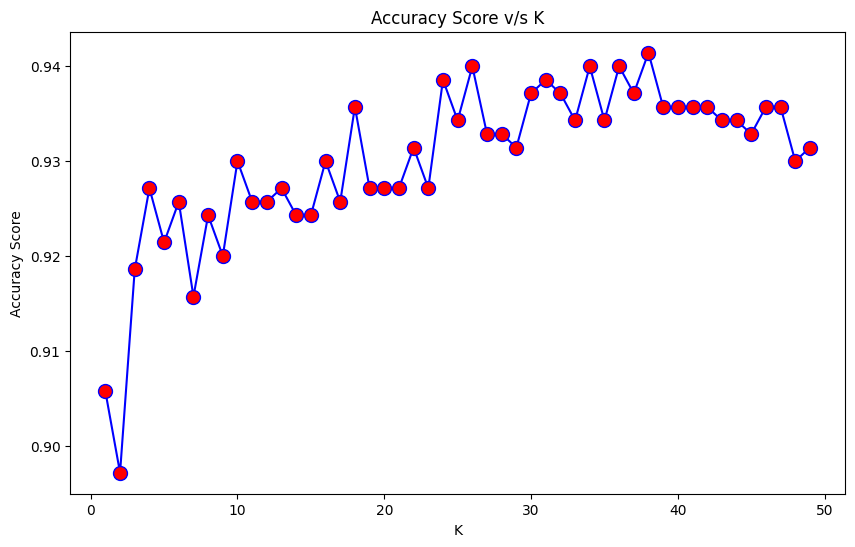

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), accuracy_score, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title("Accuracy Score v/s K")
plt.xlabel('K')
plt.ylabel("Accuracy Score")
plt.show()

### **Here, performing fit and transform entire X_train and y_train and then passing to compute accuracy for every fold is not effective. Instead, we have to fit and transform X_train and y_train for every fold separately using pipeline feature**

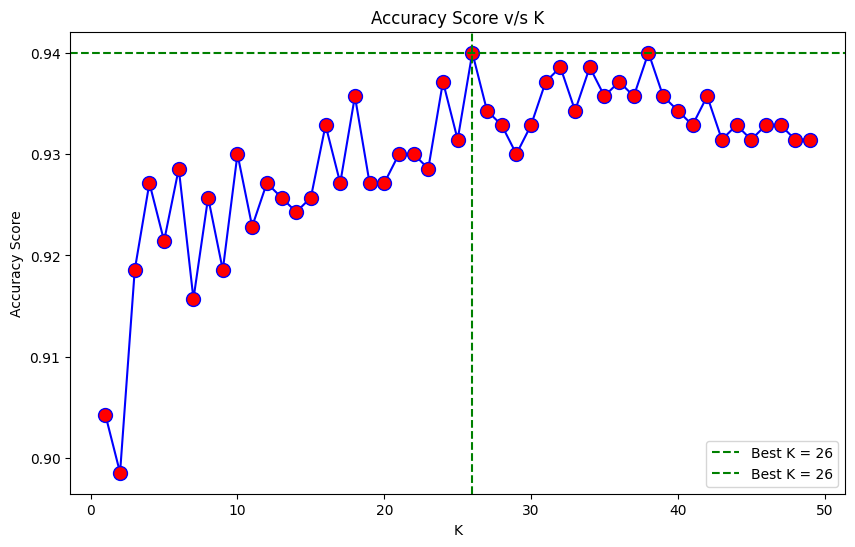

In [94]:
from sklearn.pipeline import Pipeline
accuracy_score = []
for i in range(1, 50):
  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('knn', KNeighborsClassifier(n_neighbors = i))
      ])
  score = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='accuracy') # Non-Standardized X_train and y_train
  accuracy_score.append(np.mean(score))

#Plotting
best_k = np.argmax(accuracy_score) + 1
best_score = np.max(accuracy_score)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), accuracy_score, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.axvline(best_k, color='green', linestyle='--', label=f'Best K = {best_k}')
plt.axhline(best_score, color='green', linestyle='--', label=f'Best K = {best_k}')
plt.title("Accuracy Score v/s K")
plt.xlabel('K')
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()